<a href="https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/ProbForML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the notebook for the video [Dissecting one of the most used loss functions in deep learning - cross entropy loss](https://youtu.be/LOh5-LTdosU)

- [Code walkthrough of this notebook](https://youtu.be/gDX5-HUtvpg) [![Code Walkthrough](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/codewalkthrough.svg)](https://youtu.be/gDX5-HUtvpg)


To recap, entropy assigns a number  to the information content in an event.

- High probability events have low surprise value (so low entropy).
- Low probability events have high surprise value (so high entropy).
- Numerically, **the entropy of an event** is the **negative logarithm of its probability**. *The logarithm is to the base 2*.

The **entropy of a probability distribution**, on the other hand, is the sum of the entropy of the individual events **weighted** by the probability of those events.

The **goal of this notebook** is to illustrate the underlying reason for **why  cross-entropy (explained below) is used as a loss function**


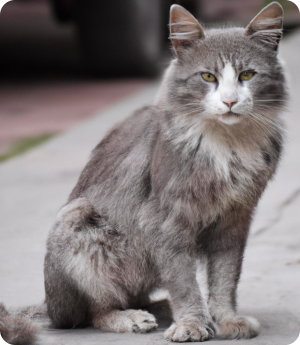

- Imagine a model is learning to predict the distribution for some input. For example, the model predicts, 80% cat and 20% dog, for the image above.

- Lets use  these predictions to
  - compute the entropy of each event, and then
  - weight the entropy of each event by the true probability of that event,  say  90% for cat and 10% for dog in the image above.

- This value we computed, also called **cross-entropy**, will be lowest only if, the predicted probabilities are the same as the true probabilities, which is not, in this case.

- That is, **cross-entropy is lowest, only when the predicted distribution, is the same as the true distribution for an input**  - which is 90% cat and 10% in our example.

- So **cross-entropy** - **which is a single number**, captures **how far off**, the models **predicted distribution is**, from the **true distribution**. Closer the probabilities of the predicted distribution events to the corresponding event probabilities in the true distribution, lower the cross-entropy value.







### Lets understand cross-entropy loss with a concrete example

#### 1. So lets start with the true probability distribution for the example image above


In [ ]:
y_true = [0.9, 0.1] #True distribution

#### 2.  Function implementing Cross-entropy Loss

In [ ]:
import numpy as np

def cross_entropy(y_true, y_pred):
    """
    Calculate the cross entropy between a true and a predicted distribution

    Args:
    y_true: A list representing the true probability distribution.
    y_pred: A list representing the predicted probability distribution.

    Returns:
    The cross entropy of the two distributions.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # The distributions should be valid probability distributions
    assert np.isclose(np.sum(y_true), 1), "True distribution should sum to 1."
    assert np.isclose(np.sum(y_pred), 1), "Predicted distribution should sum to 1."
    assert (y_true >= 0).all(), "All elements in the true distribution should be non-negative."
    assert (y_pred >= 0).all(), "All elements in the predicted distribution should be non-negative."

    # Exclude zero values to avoid log(0)
    mask = y_true > 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    return round(-np.sum(y_true * np.log2(y_pred)),3) #Cross entropy computation

#### 3. Lets compute cross-entropy  when **predicted and true probability distributions are the same**

In [ ]:
print(f"True distribution is: {y_true}")
print(f"Cross-entropy in this case is entropy of true distribution: {cross_entropy(y_true, y_true)}") #Note this is the lowest value we can get for the entropy of the distribution [.9,.1]
                                    #this is the case where the cross entropy value is the same as the entropy of the true distribution

True distribution is: [0.9, 0.1]
Cross-entropy in this case is entropy of true distribution :0.469


*We will see in the next step, that this is the  lowest possible value  of cross-entropy for the true distribution .9 and .1*

#### 4. Next lets compute cross-entropy for cases the where predicted probability distribution **is not the same** as the true probability distribution

In [ ]:
for i in range(1,9):
    i = round(i*.1,1)
    y_pred = [round(y_true[0] - i,1), round(y_true[1] + i,1)]
    print(f"Predicted distribution is: {y_pred}")
    print(f"Cross entropy is : {cross_entropy(y_true, y_pred)}\n") #All the cross entropy values will be more than the number computed above. So minimizing cross entropy loss enables a model to learn

Predicted distribution is: [0.8, 0.2]
Cross entropy is : 0.522

Predicted distribution is: [0.7, 0.3]
Cross entropy is : 0.637

Predicted distribution is: [0.6, 0.4]
Cross entropy is : 0.795

Predicted distribution is: [0.5, 0.5]
Cross entropy is : 1.0

Predicted distribution is: [0.4, 0.6]
Cross entropy is : 1.263

Predicted distribution is: [0.3, 0.7]
Cross entropy is : 1.615

Predicted distribution is: [0.2, 0.8]
Cross entropy is : 2.122

Predicted distribution is: [0.1, 0.9]
Cross entropy is : 3.005



*Note **all the values** of cross-entropy computed above **is larger than the entropy of the true distribution**. This fact makes cross-entropy useful as a loss function*

Cross-entropy loss is used in deep learning models for any classification task - whether it is over two classes, multiple classes, or multiple labels. In all these classification tasks, the  model is trying to predict a probability distribution. Cross-entropy captures how far off the predicted distribution is from the true distribution.

Cross-entropy loss is also used in autoregressive tasks, such as language modeling. For example, ChatGPT learns by predicting the next word in a sentence given the previous words. Cross-entropy loss is suitable here because it effectively measures how well the model's predicted probability distribution (over all the words in the models vocabulary) aligns with the true distribution.

As a concrete example, consider the sentence "She fell". Lets assume the model predicts the word "and" with the highest probability and the word "down" with a lower probability. Assume the actual word in the sentence is "down". The true distribution assigns probability 1 for "down" and 0 for all other words in model's vocabulary. So the cross-entropy loss would only have one non-zero term - which is for the word "down". Since the true probability of that is 1, the cross entropy loss would be the negative log of the predicted probability for "down". Closer this predicted probability is to 1, lower the loss. Further the predicted probability of "down" is from 1, greater the loss. In summary, cross-entropy loss essentially captures the error in a model's prediction in a single number which is then used to nudge the model's parameters to make correct predictions, during training.



**Additional notes:**

*Some of these terms and phrases in these notes may not make sense now - we will examine them in future videos and notebooks.*

- Cross-entropy loss has some benefits
  - when used with softmax the gradient is smooth and this helps model converge faster.
  - Cross-entropy provides a probabilistic interpretation of the model's output. A lower cross-entropy indicates that the predicted probabilities are closer to the true labels, which is inherently intuitive.
- Since the cross-entropy value is always greater than entropy of the true distribution, the difference between these two values is always positive. This difference is called **KL-divergence.** and is also used as a loss function in some machine learning tasks. Cross-entropy loss is typically used for  classification and autoregressive tasks, as mentioned earlier. KL divergence is used in models like Variational autoencoders to quantify the difference between a latent variable distribution and a prior distribution, like a Gaussian.